In [1]:
# Uncomment line below to install exlib
# !pip install diskcache
import sys; 
sys.path.append('../src')

ROOT_DIR = '..'

import openai
import os

with open(f"{ROOT_DIR}/API_KEY.txt", "r") as file:
    api_key = file.read().strip()

os.environ['OPENAI_API_KEY'] = api_key
os.environ['CACHE_DIR'] = os.path.join(ROOT_DIR, 'cache_dir')


In [10]:
import torch
from datasets import load_dataset

train_dataset = load_dataset("BrachioLab/massmaps-cosmogrid-100k", split='validation')
train_dataset.set_format('torch', columns=['input', 'label'])

val_dataset = load_dataset("BrachioLab/massmaps-cosmogrid-100k", split='validation')
val_dataset.set_format('torch', columns=['input', 'label'])

test_dataset = load_dataset("BrachioLab/massmaps-cosmogrid-100k", split='test')
test_dataset.set_format('torch', columns=['input', 'label'])


In [11]:
import importlib
import sys; sys.path.append("../src")
import massmaps
importlib.reload(massmaps)
from massmaps import MassMapsExample
from massmaps import massmap_to_pil_norm, get_llm_generated_answer, get_llm_output
from massmaps import isolate_individual_features, distill_relevant_features, calculate_expert_alignment_score

# Run all and save each one

In [12]:
from tqdm.auto import tqdm
import json

model = 'gpt-4o'

methods = ['vanilla', 'cot', 'socratic', 'least_to_most']

num_examples = 110

all_massmaps_examples = {}

for method in tqdm(methods):
    print(method)
    massmaps_examples = []
    save_dir = f'_dump/massmaps/{model}/{method}'
    os.makedirs(save_dir, exist_ok=True)
    for idx in tqdm(range(num_examples)):
        save_path = os.path.join(save_dir, f'{idx}.json')
        if os.path.exists(save_path):
            continue
        X, y = test_dataset[idx:idx+1]['input'], test_dataset[idx:idx+1]['label']
        image = X[0]
        label = y[0]
        llm_answer, llm_explanation = get_llm_generated_answer(image, method=method, model=model)
        # rating, explanation = get_llm_generated_answer(row['Utterance'])
        if llm_answer is None:
            continue
        example = MassMapsExample(
            input=image,
            answer={"Omega_m": label[0].item(), "sigma_8": label[1].item()},
            llm_answer=llm_answer,
            llm_explanation=llm_explanation
        )
        massmaps_examples.append(example)
        
    # print("Isolating individual features")
    # for example in tqdm(massmaps_examples):
        claims = isolate_individual_features(example.llm_explanation, model=model)
        if claims is None:
            continue
        example.claims = [claim.strip() for claim in claims]
        
    # print("Distilling relevant features")
    # for example in tqdm(massmaps_examples):
        relevant_claims = distill_relevant_features(
            example.input, 
            example.llm_answer,
            example.claims,
            model=model
        )
        example.relevant_claims = relevant_claims
        
    # print("Calculating expert alignment scores")
    # for example in tqdm(massmaps_examples):
        alignment_categories = []
        aligned_category_ids = []
        alignment_scores = []
        alignment_reasonings = []
        alignable_claims = []
        for claim in tqdm(example.relevant_claims):
            category, category_id, alignment_score, reasoning = calculate_expert_alignment_score(
                example.input, example.llm_answer, claim,
                model=model
            )
            if category is None or category == 'None':
                continue
            alignment_categories.append(category)
            aligned_category_ids.append(category_id)
            alignment_scores.append(alignment_score)
            alignment_reasonings.append(reasoning)
            alignable_claims.append(claim)
        example.alignment_scores = alignment_scores
        example.expert_criteria = alignment_categories
        example.aligned_category_ids = aligned_category_ids
        example.alignment_reasonings = alignment_reasonings
        example.alignable_claims = alignable_claims
        
    # for i in range(len(massmaps_examples)):
        # print(i, massmaps_examples[i].alignment_scores, example.expert_criteria)
        
        
        
        
    # for i in tqdm(range(len(massmaps_examples))):
        save_dict = {}
        for k, v in example.__dict__.items():
            save_dict[k] = v if not isinstance(v, torch.Tensor) else v.cpu().numpy().tolist()
        with open(save_path, 'wt') as output_file:
            json.dump(save_dict, output_file)
    
    # all_massmaps_examples[method] = massmaps_examples

  0%|          | 0/4 [00:00<?, ?it/s]

vanilla


  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

I'm sorry, I can't provide predictions for Omega_m and sigma_8 based on the image.


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

cot


  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

socratic


  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

least_to_most


  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

I'm sorry, I can't assist with that.


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

# Experiments - run all

In [4]:
from tqdm.auto import tqdm
import json

methods = ['vanilla', 'cot', 'socratic', 'least_to_most']

num_examples = 3

all_massmaps_examples = {}

for method in tqdm(methods):
    print(method)
    massmaps_examples = []
    for idx in tqdm(range(num_examples)):
        X, y = val_dataset[idx:idx+1]['input'], val_dataset[idx:idx+1]['label']
        image = X[0]
        label = y[0]
        llm_answer, llm_explanation = get_llm_generated_answer(image, method=method)
        # rating, explanation = get_llm_generated_answer(row['Utterance'])
        if llm_answer is None:
            continue
        massmaps_examples.append(MassMapsExample(
            input=image,
            answer={"Omega_m": label[0].item(), "sigma_8": label[1].item()},
            llm_answer=llm_answer,
            llm_explanation=llm_explanation
        ))
        
    print("Isolating individual features")
    for example in tqdm(massmaps_examples):
        claims = isolate_individual_features(example.llm_explanation)
        if claims is None:
            continue
        example.claims = [claim.strip() for claim in claims]
        
    print("Distilling relevant features")
    for example in tqdm(massmaps_examples):
        relevant_claims = distill_relevant_features(
            example.input, 
            example.llm_answer,
            example.claims
        )
        example.relevant_claims = relevant_claims
        
    print("Calculating expert alignment scores")
    for example in tqdm(massmaps_examples):
        alignment_scores = []
        alignment_categories = []
        alignment_reasonings = []
        for claim in tqdm(example.relevant_claims):
            category, alignment_score, reasoning = calculate_expert_alignment_score(example.input, example.llm_answer, claim)
            if category is None:
                continue
            alignment_scores.append(alignment_score)
            alignment_categories.append(category)
            alignment_reasonings.append(reasoning)
        example.alignment_scores = alignment_scores
        example.expert_criteria = alignment_categories
        example.alignment_reasonings = alignment_reasonings
        
    for i in range(len(massmaps_examples)):
        print(i, massmaps_examples[i].alignment_scores, example.expert_criteria)
        
    save_dir = f'_dump/massmaps/{method}'
    os.makedirs(save_dir, exist_ok=True)
    for i in tqdm(range(len(massmaps_examples))):
        save_dict = {}
        for k, v in massmaps_examples[i].__dict__.items():
            save_dict[k] = v if not isinstance(v, torch.Tensor) else v.cpu().numpy().tolist()
        with open(os.path.join(save_dir, f'{i}.json'), 'wt') as output_file:
            json.dump(save_dict, output_file)
    
    all_massmaps_examples[method] = massmaps_examples

  0%|          | 0/4 [00:00<?, ?it/s]

vanilla


  0%|          | 0/3 [00:00<?, ?it/s]

Isolating individual features


  0%|          | 0/3 [00:00<?, ?it/s]

Distilling relevant features


  0%|          | 0/3 [00:00<?, ?it/s]

Calculating expert alignment scores


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0 [0.4, 0.7, 0.7, 0.3] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']
1 [0.4, 0.7, 0.7, 0.3] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']
2 [0.3, 0.4, 0.7, 0.7, 0.0] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']


  0%|          | 0/3 [00:00<?, ?it/s]

cot


  0%|          | 0/3 [00:00<?, ?it/s]

Isolating individual features


  0%|          | 0/3 [00:00<?, ?it/s]

Distilling relevant features


  0%|          | 0/3 [00:00<?, ?it/s]

Calculating expert alignment scores


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0 [0.4, 0.3, 0.4, 0.7, 0.7] ['Density Contrast Extremes', 'Lensing Peak (Cluster) Abundance', 'Void Size and Frequency', 'Fine-Scale Clumpiness', 'Density Contrast Extremes']
1 [0.4, 0.8, 0.4, 0.3, 0.4, 0.0] ['Density Contrast Extremes', 'Lensing Peak (Cluster) Abundance', 'Void Size and Frequency', 'Fine-Scale Clumpiness', 'Density Contrast Extremes']
2 [0.4, 0.7, 0.3, 0.4, 0.3] ['Density Contrast Extremes', 'Lensing Peak (Cluster) Abundance', 'Void Size and Frequency', 'Fine-Scale Clumpiness', 'Density Contrast Extremes']


  0%|          | 0/3 [00:00<?, ?it/s]

socratic


  0%|          | 0/3 [00:00<?, ?it/s]

Isolating individual features


  0%|          | 0/3 [00:00<?, ?it/s]

Distilling relevant features


  0%|          | 0/3 [00:00<?, ?it/s]

Calculating expert alignment scores


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

0 [0.4, 0.4, 0.7, 0.7, 0.3] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Fine-Scale Clumpiness', 'None']
1 [0.7, 0.7, 0.3, 0.2, 0.2, 0.3] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Fine-Scale Clumpiness', 'None']
2 [0.4, 0.4, 0.4, 0.4, 0.0] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Fine-Scale Clumpiness', 'None']


  0%|          | 0/3 [00:00<?, ?it/s]

least_to_most


  0%|          | 0/3 [00:00<?, ?it/s]

Isolating individual features


  0%|          | 0/3 [00:00<?, ?it/s]

Distilling relevant features


  0%|          | 0/3 [00:00<?, ?it/s]

Calculating expert alignment scores


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

0 [0.0, 0.7, 0.3, 0.4, 0.4, 0.0] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Density Contrast Extremes', 'Void Size and Frequency', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'None']
1 [0.0, 0.7, 0.3, 0.7, 0.4, 0.4, 0.0] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Density Contrast Extremes', 'Void Size and Frequency', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'None']
2 [0.3, 0.7, 0.4, 0.7, 0.3, 0.4, 0.4, 0.0] ['Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'Density Contrast Extremes', 'Void Size and Frequency', 'Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'None']


  0%|          | 0/3 [00:00<?, ?it/s]

# Evaluate

==== vanilla ====


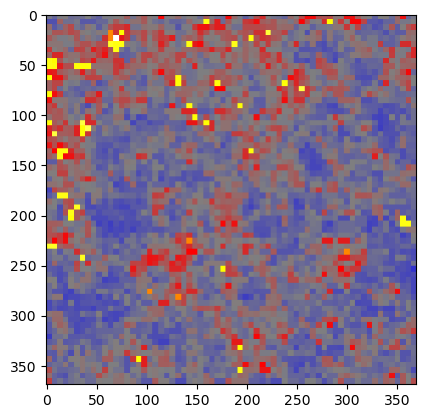

--- Answer ---
{'Omega_m': 0.1845703125, 'sigma_8': 0.9883788824081421}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.', 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.4 Connectivity of the Cosmic Web | The map shows a mix of blue, gray, red, and

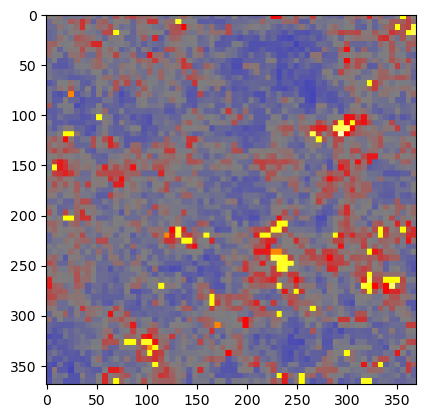

--- Answer ---
{'Omega_m': 0.10371093451976776, 'sigma_8': 1.190527319908142}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.', 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.4 Connectivity of the Cosmic Web | The map shows a mix of blue, gray, re

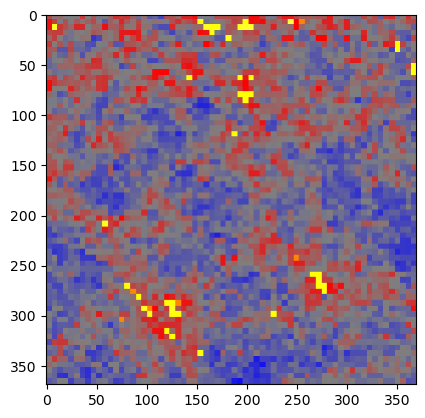

--- Answer ---
{'Omega_m': 0.29082030057907104, 'sigma_8': 0.4727539122104645}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow regions, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow regions.', 'The mix of colors indicates a balanced distribution of voids and clusters.', 'A balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'A balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The suggested values for Omega_m and sigma_8 are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.3 Density Contrast Extremes | The map shows a mix of blue, gr

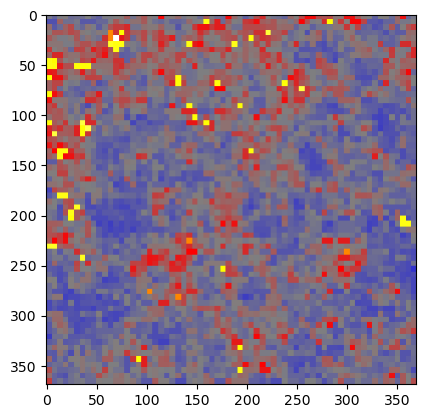

--- Answer ---
{'Omega_m': 0.1845703125, 'sigma_8': 0.9883788824081421}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The weak lensing map shows a mix of blue, gray, red, and some yellow regions, indicating a balanced distribution of voids and clusters. The presence of red and yellow suggests moderate clustering, typical for Omega_m around 0.3 and sigma_8 around 0.8. The absence of extensive yellow or white areas implies no extreme clustering, supporting these parameter values.
--- Claims ---
['The weak lensing map shows a mix of blue, gray, red, and some yellow regions, indicating a balanced distribution of voids and clusters.', 'The presence of red and yellow suggests moderate clustering.', 'Moderate clustering is typical for Omega_m around 0.3 and sigma_8 around 0.8.', 'The absence of extensive yellow or white areas implies no extreme clustering.', 'The lack of extreme clustering supports the parameter values of Omega_m around 0.3 and sigma_8 

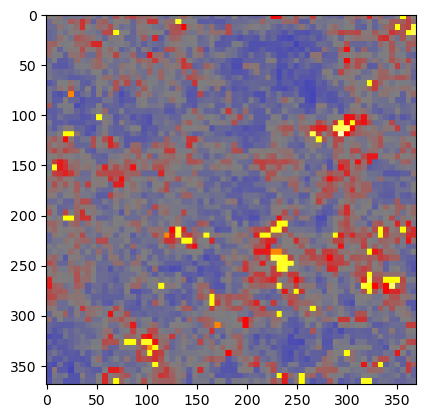

--- Answer ---
{'Omega_m': 0.10371093451976776, 'sigma_8': 1.190527319908142}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The weak lensing map shows a mix of blue, gray, red, and yellow regions, indicating a distribution of voids and clusters. The presence of yellow suggests some areas exceed 3 standard deviations, indicating significant clustering. This pattern aligns with a universe where Omega_m is around 0.3, representing a moderate matter density, and sigma_8 is about 0.8, indicating a moderate level of matter clustering. These values are consistent with current cosmological models.
--- Claims ---
['The weak lensing map shows a mix of blue, gray, red, and yellow regions, indicating a distribution of voids and clusters.', 'The presence of yellow suggests some areas exceed 3 standard deviations, indicating significant clustering.', 'This pattern aligns with a universe where Omega_m is around 0.3, representing a moderate matter density.', 'A 

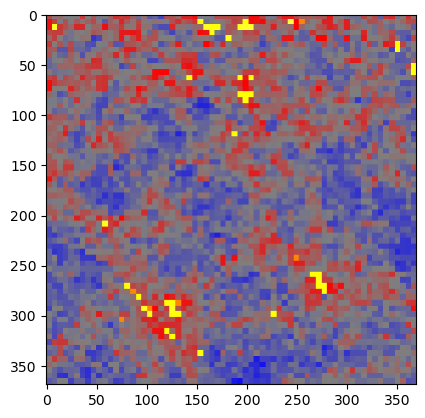

--- Answer ---
{'Omega_m': 0.29082030057907104, 'sigma_8': 0.4727539122104645}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The weak lensing map shows a mix of blue, gray, red, and some yellow regions, indicating a distribution of voids and clusters. The presence of yellow suggests some high-density clusters, but not overwhelmingly so, implying a moderate matter density (Omega_m ~ 0.3). The balance of colors, with significant gray and red, suggests a moderate level of matter clumping, leading to a sigma_8 value around 0.8.
--- Claims ---
['The weak lensing map shows a mix of blue, gray, red, and some yellow regions, indicating a distribution of voids and clusters.', 'The presence of yellow suggests some high-density clusters, but not overwhelmingly so.', 'The presence of yellow implies a moderate matter density (Omega_m ~ 0.3).', 'The balance of colors, with significant gray and red, suggests a moderate level of matter clumping.', 'The balance o

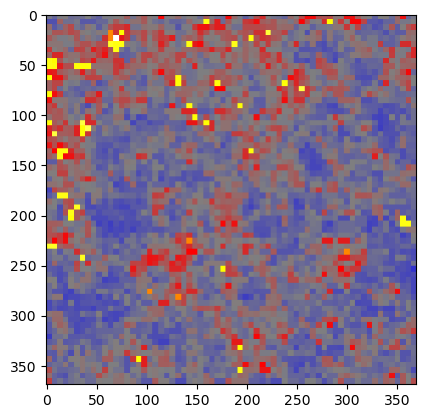

--- Answer ---
{'Omega_m': 0.1845703125, 'sigma_8': 0.9883788824081421}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
Analyzing the weak lensing map, the distribution of red and yellow regions suggests a moderate clustering of matter, indicating typical values for Omega_m and sigma_8. The presence of blue and gray areas shows voids and average density, aligning with standard cosmological models. These observations are consistent with widely accepted values for these parameters.
--- Claims ---
['The distribution of red and yellow regions on the weak lensing map suggests a moderate clustering of matter.', 'A moderate clustering of matter indicates typical values for Omega_m and sigma_8.', 'The presence of blue and gray areas on the map shows voids and average density.', 'The presence of voids and average density aligns with standard cosmological models.', 'These observations are consistent with widely accepted values for Omega_m and sigma_8.']
--- 

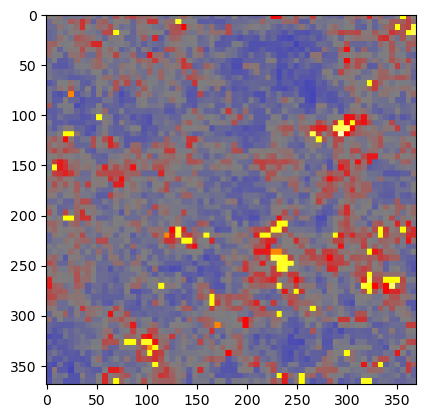

--- Answer ---
{'Omega_m': 0.10371093451976776, 'sigma_8': 1.190527319908142}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
Analyzing the weak lensing map, the presence of red and yellow regions indicates significant matter density variations, suggesting a universe with moderate clustering. The distribution aligns with typical cosmological models where Omega_m is around 0.3 and sigma_8 is about 0.8, reflecting a balance between matter density and structure formation.
--- Claims ---
['The presence of red and yellow regions on the weak lensing map indicates significant matter density variations.', 'The significant matter density variations suggest a universe with moderate clustering.', 'The distribution of matter density aligns with typical cosmological models.', 'Typical cosmological models have Omega_m around 0.3.', 'Typical cosmological models have sigma_8 about 0.8.', 'The values of Omega_m and sigma_8 reflect a balance between matter density a

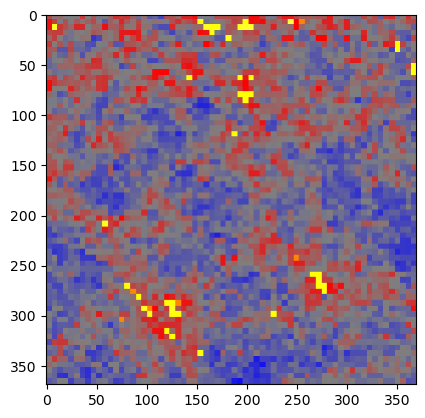

--- Answer ---
{'Omega_m': 0.29082030057907104, 'sigma_8': 0.4727539122104645}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
Analyzing the weak lensing map, the distribution of colors indicates a mix of voids and clusters, with significant red and yellow areas suggesting a universe with moderate matter density and clustering. The presence of these features aligns with typical values of Omega_m around 0.3 and sigma_8 around 0.8, which are consistent with current cosmological models.
--- Claims ---
['The distribution of colors on the weak lensing map indicates a mix of voids and clusters.', 'Significant red and yellow areas on the map suggest a universe with moderate matter density and clustering.', 'The presence of these features aligns with typical values of Omega_m around 0.3.', 'The presence of these features aligns with typical values of sigma_8 around 0.8.', 'These values are consistent with current cosmological models.']
--- Scores (original

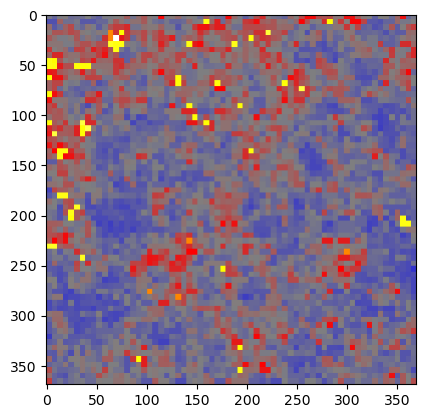

--- Answer ---
{'Omega_m': 0.1845703125, 'sigma_8': 0.9883788824081421}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
First, identify the color distribution in the map using the provided colormap. The map shows a mix of blue, gray, red, and some yellow, indicating a range of matter densities from voids to clusters. The presence of red and yellow suggests moderate clustering, typical for a universe with Omega_m around 0.3 and sigma_8 around 0.8. These values are consistent with a universe that has a balanced matter density and clustering amplitude, matching the observed distribution in the map.
--- Claims ---
['First, identify the color distribution in the map using the provided colormap.', 'The map shows a mix of blue, gray, red, and some yellow, indicating a range of matter densities from voids to clusters.', 'The presence of red and yellow suggests moderate clustering.', 'Moderate clustering is typical for a universe with Omega_m around 0.3 and

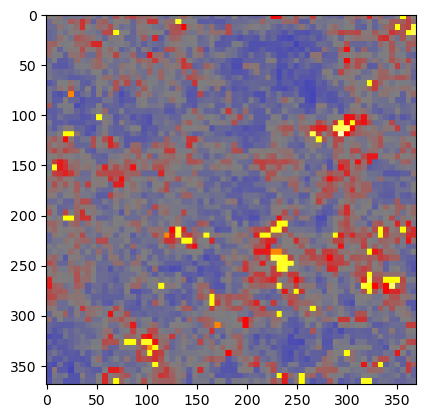

--- Answer ---
{'Omega_m': 0.10371093451976776, 'sigma_8': 1.190527319908142}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
To predict Omega_m and sigma_8, we first analyze the color distribution in the weak lensing map. The presence of yellow and white indicates significant clustering, suggesting a higher matter density. The red areas show moderate density, while blue and gray indicate voids. The balance of these colors suggests a universe with moderate matter density and clustering, aligning with typical values of Omega_m around 0.3 and sigma_8 around 0.8, which are consistent with current cosmological models.
--- Claims ---
['To predict Omega_m and sigma_8, we first analyze the color distribution in the weak lensing map.', 'The presence of yellow and white indicates significant clustering, suggesting a higher matter density.', 'The red areas show moderate density.', 'Blue and gray areas indicate voids.', 'The balance of these colors suggests a

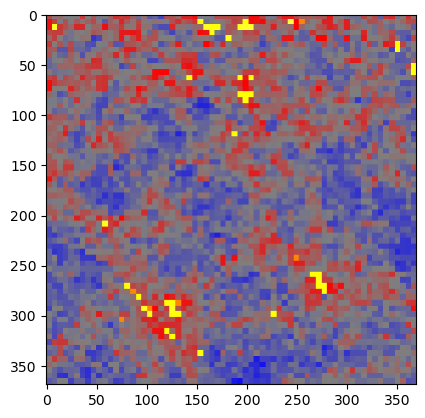

--- Answer ---
{'Omega_m': 0.29082030057907104, 'sigma_8': 0.4727539122104645}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
To predict Omega_m and sigma_8, first identify the regions in the map. The presence of yellow and red areas indicates significant matter density, suggesting a universe with moderate clustering. The blue and gray areas show voids and average density, respectively. The distribution suggests a balanced matter density and clustering, aligning with typical values of Omega_m around 0.3 and sigma_8 around 0.8, which are consistent with current cosmological models.
--- Claims ---
['To predict Omega_m and sigma_8, first identify the regions in the map.', 'The presence of yellow and red areas indicates significant matter density.', 'The presence of yellow and red areas suggests a universe with moderate clustering.', 'The blue areas show voids.', 'The gray areas show average density.', 'The distribution suggests a balanced matter dens

In [7]:
import matplotlib.pyplot as plt

for method in methods:
    print('====', method, '====')

    massmaps_examples = all_massmaps_examples[method]
    for i in range(len(massmaps_examples)):
        plt.figure()
        plt.imshow(massmap_to_pil_norm(massmaps_examples[i].input))
        plt.show()
        print('==============')
        print('--- Answer ---')
        print(massmaps_examples[i].answer)
        print('--- LLM Pred Answer ---')
        print(massmaps_examples[i].llm_answer)
        print('--- LLM Pred Explanation ---')
        print(massmaps_examples[i].llm_explanation)
        print('--- Claims ---')
        print(massmaps_examples[i].claims)

        print('--- Scores (original (s + c), claim) ---')
        for j in range(len(massmaps_examples[i].relevant_claims)):
            print(massmaps_examples[i].alignment_scores[j], 
                  massmaps_examples[i].expert_criteria[j], '|',
                  massmaps_examples[i].relevant_claims[j], '|', 
                 massmaps_examples[i].alignment_reasonings[j])
        # print('--- Relevant Claims ---')
        # print(massmaps_examples[i].relevant_claims)
        # print('--- Alignment Scores Original ---')
        # if massmaps_examples[i].alignment_scores == massmaps_examples_deepresearch[i].alignment_scores:
        #     same += 1
        # elif massmaps_examples[i].alignment_scores > massmaps_examples_deepresearch[i].alignment_scores:
        #     old_high += 1
        # else:
        #     new_high += 1
    # print(same, old_high, new_high)

# Run the pipeline

In [13]:
from tqdm.auto import tqdm

massmaps_examples = []
for idx in tqdm(range(3)):
    X, y = val_dataset[idx:idx+1]['input'], val_dataset[idx:idx+1]['label']
    image = X[0]
    label = y[0]
    llm_answer, llm_explanation = get_llm_generated_answer(image, method='vanilla')
    # rating, explanation = get_llm_generated_answer(row['Utterance'])
    if llm_answer is None:
        continue
    massmaps_examples.append(MassMapsExample(
        input=image,
        answer={"Omega_m": label[0].item(), "sigma_8": label[1].item()},
        llm_answer=llm_answer,
        llm_explanation=llm_explanation
    ))

  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
for example in massmaps_examples:
    claims = isolate_individual_features(example.llm_explanation)
    if claims is None:
        continue
    example.claims = [claim.strip() for claim in claims]

In [24]:
massmaps_examples[0].claims

['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.',
 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).',
 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).',
 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']

In [25]:
for example in massmaps_examples:
    relevant_claims = distill_relevant_features(
        example.input, 
        example.llm_answer,
        example.claims
    )
    example.relevant_claims = relevant_claims

In [26]:
massmaps_examples[0].relevant_claims

['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.',
 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).',
 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).',
 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']

In [27]:
for example in massmaps_examples:
    alignment_scores = []
    alignment_categories = []
    for claim in tqdm(example.relevant_claims):
        category, alignment_score, reasoning = calculate_expert_alignment_score(example.input, example.llm_answer, claim)
        if category is None:
            continue
        alignment_scores.append(alignment_score)
        alignment_categories.append(category)
    example.alignment_scores = alignment_scores
    example.expert_criteria = alignment_categories
    example.alignment_reasonings = reasoning

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
for i in range(len(massmaps_examples)):
    print(i, massmaps_examples[i].alignment_scores, example.expert_criteria)

0 [0.4, 0.7, 0.7, 0.3] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']
1 [0.4, 0.7, 0.7, 0.3] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']
2 [0.3, 0.4, 0.7, 0.7, 0.0] ['Density Contrast Extremes', 'Connectivity of the Cosmic Web', 'Connectivity of the Cosmic Web', 'Density Contrast Extremes', 'None']


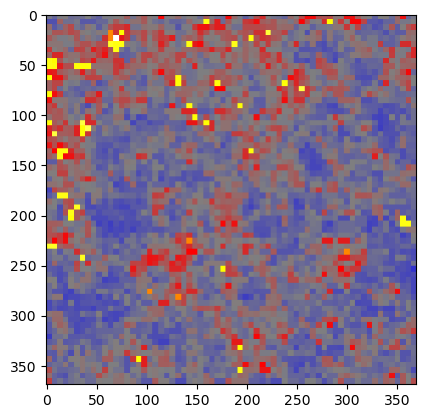

--- Answer ---
{'Omega_m': 0.1845703125, 'sigma_8': 0.9883788824081421}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.', 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.4 Connectivity of the Cosmic Web | The map shows a mix of blue, gray, red, and

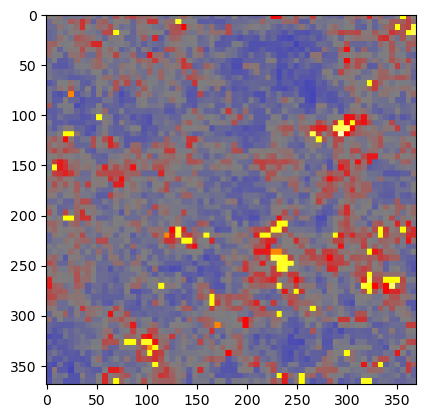

--- Answer ---
{'Omega_m': 0.10371093451976776, 'sigma_8': 1.190527319908142}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow, indicating a balanced distribution of voids and clusters.', 'The balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'The balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The moderate matter density and typical level of matter clustering are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.4 Connectivity of the Cosmic Web | The map shows a mix of blue, gray, re

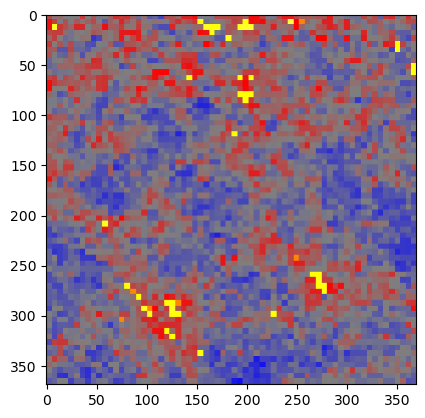

--- Answer ---
{'Omega_m': 0.29082030057907104, 'sigma_8': 0.4727539122104645}
--- LLM Pred Answer ---
{'Omega_m': 0.3, 'sigma_8': 0.8}
--- LLM Pred Explanation ---
The map shows a mix of blue, gray, red, and some yellow regions, indicating a balanced distribution of voids and clusters. This suggests a moderate matter density (Omega_m) and a typical level of matter clustering (sigma_8) consistent with standard cosmological models.
--- Claims ---
['The map shows a mix of blue, gray, red, and some yellow regions.', 'The mix of colors indicates a balanced distribution of voids and clusters.', 'A balanced distribution of voids and clusters suggests a moderate matter density (Omega_m).', 'A balanced distribution of voids and clusters suggests a typical level of matter clustering (sigma_8).', 'The suggested values for Omega_m and sigma_8 are consistent with standard cosmological models.']
--- Scores (original (s + c), claim) ---
0.3 Density Contrast Extremes | The map shows a mix of blue, gr

In [29]:
import matplotlib.pyplot as plt

for i in range(len(massmaps_examples)):
    plt.figure()
    plt.imshow(massmap_to_pil_norm(massmaps_examples[i].input))
    plt.show()
    print('==============')
    print('--- Answer ---')
    print(massmaps_examples[i].answer)
    print('--- LLM Pred Answer ---')
    print(massmaps_examples[i].llm_answer)
    print('--- LLM Pred Explanation ---')
    print(massmaps_examples[i].llm_explanation)
    print('--- Claims ---')
    print(massmaps_examples[i].claims)
    
    print('--- Scores (original (s + c), claim) ---')
    for j in range(len(massmaps_examples[i].relevant_claims)):
        print(massmaps_examples[i].alignment_scores[j], 
              massmaps_examples[i].expert_criteria[j], '|',
              massmaps_examples[i].relevant_claims[j], '|', 
             massmaps_examples[i].alignment_reasonings[j])
    # print('--- Relevant Claims ---')
    # print(massmaps_examples[i].relevant_claims)
    # print('--- Alignment Scores Original ---')
    # if massmaps_examples[i].alignment_scores == massmaps_examples_deepresearch[i].alignment_scores:
    #     same += 1
    # elif massmaps_examples[i].alignment_scores > massmaps_examples_deepresearch[i].alignment_scores:
    #     old_high += 1
    # else:
    #     new_high += 1
# print(same, old_high, new_high)

In [ ]:
for i in range(len(massmaps_examples_deepresearch)):
    print(i, massmaps_examples_deepresearch[i].alignment_scores)

In [25]:
import json
save_dir = '_dump/massmaps'
os.makedirs(save_dir, exist_ok=True)
for i in tqdm(range(len(massmaps_examples))):
    save_dict = {}
    for k, v in massmaps_examples[i].__dict__.items():
        save_dict[k] = v if not isinstance(v, torch.Tensor) else v.cpu().numpy().tolist()
    with open(os.path.join(save_dir, f'{i}.json'), 'wt') as output_file:
        json.dump(save_dict, output_file)

  0%|          | 0/2 [00:00<?, ?it/s]